# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import opm_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_path = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}appid={opm_key}&units={units}&q="


In [4]:
city_list=[]
cnty=[]
date=[]
humid=[]
clouds=[]
lat=[]
lon=[]
temp=[]
wind=[]

progress = 0
skipped = 0

for i in cities:
    try:
        city_data = requests.get(query_url + i).json()
        
        city_list.append(city_data["name"])
        cnty.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humid.append(city_data["main"]["humidity"])
        clouds.append(city_data["clouds"]["all"])
        lat.append(city_data["coord"]["lat"])
        lon.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp_max"])
        wind.append(city_data["wind"]["speed"])
        
        progress += 1
        print(f"{progress} of {city_count} processed: {i}")
        
    except:
        print("no data - skipped")
        skipped += 1


print(f"{skipped} cities skipped.")

1 of 605 processed: sitka
2 of 605 processed: shurugwi
3 of 605 processed: grindavik
4 of 605 processed: punta arenas
5 of 605 processed: bredasdorp
6 of 605 processed: harper
7 of 605 processed: hermanus
8 of 605 processed: ushuaia
9 of 605 processed: hilo
no data - skipped
10 of 605 processed: san patricio
11 of 605 processed: qaqortoq
12 of 605 processed: rikitea
13 of 605 processed: bluff
14 of 605 processed: busselton
15 of 605 processed: alyangula
no data - skipped
16 of 605 processed: jiwani
17 of 605 processed: pisco
18 of 605 processed: bandarbeyla
19 of 605 processed: port elizabeth
20 of 605 processed: hobyo
no data - skipped
21 of 605 processed: la paz
22 of 605 processed: tuktoyaktuk
no data - skipped
23 of 605 processed: richards bay
24 of 605 processed: pevek
25 of 605 processed: turukhansk
26 of 605 processed: saidpur
27 of 605 processed: ulaangom
28 of 605 processed: puerto ayora
29 of 605 processed: komsomolskiy
30 of 605 processed: katsuura
31 of 605 processed: james

no data - skipped
252 of 605 processed: kalmunai
no data - skipped
no data - skipped
253 of 605 processed: monsefu
254 of 605 processed: auki
255 of 605 processed: poum
256 of 605 processed: northam
257 of 605 processed: jerez
258 of 605 processed: ostrovnoy
259 of 605 processed: mana
260 of 605 processed: apache junction
261 of 605 processed: havelock
262 of 605 processed: fereydun kenar
263 of 605 processed: najran
264 of 605 processed: chifeng
265 of 605 processed: ardakan
266 of 605 processed: hohhot
267 of 605 processed: hervey bay
no data - skipped
268 of 605 processed: lichinga
269 of 605 processed: gines
no data - skipped
270 of 605 processed: touros
no data - skipped
271 of 605 processed: beisfjord
272 of 605 processed: kambove
273 of 605 processed: alekseyevsk
274 of 605 processed: tsogni
275 of 605 processed: zhob
276 of 605 processed: egvekinot
277 of 605 processed: merritt island
278 of 605 processed: eureka
279 of 605 processed: esperance
280 of 605 processed: saldanha
28

500 of 605 processed: saint-joseph
501 of 605 processed: treinta y tres
502 of 605 processed: jega
503 of 605 processed: toyooka
504 of 605 processed: miramar
505 of 605 processed: zhaodong
506 of 605 processed: normandin
507 of 605 processed: sinnamary
508 of 605 processed: sa kaeo
509 of 605 processed: santiago del estero
510 of 605 processed: yuli
511 of 605 processed: angoche
no data - skipped
512 of 605 processed: awjilah
513 of 605 processed: batemans bay
514 of 605 processed: casper
515 of 605 processed: luena
516 of 605 processed: gumrak
no data - skipped
517 of 605 processed: uyutne
518 of 605 processed: buala
519 of 605 processed: shenjiamen
520 of 605 processed: pacific grove
521 of 605 processed: ozinki
522 of 605 processed: pasighat
no data - skipped
523 of 605 processed: litovko
524 of 605 processed: vostok
525 of 605 processed: coihaique
526 of 605 processed: chandler
527 of 605 processed: yaan
no data - skipped
528 of 605 processed: iskateley
529 of 605 processed: monte

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_csv = pd.DataFrame({"City":city_list,
                         "Country":cnty,
                         "Date":date,
                         "Humidity %":humid,
                         "Cloudiness":clouds,
                         "Lattitude":lat,
                         "Longitude":lon,
                         "Max Temperature":temp,                        
                         "Wind Speed (MPH)":wind
                        })

city_csv.head()

city_csv.to_csv(output_path, index=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
def plotsplat(x,y):
    plt.scatter(x=x, y=y, edgecolor = "black")
    xn = x.name
    yn = y.name
    plt.ylabel(yn)
    plt.xlabel(xn)
    plt.grid(True)
    cur_date = pd.datetime.today().strftime("%m/%d/%Y")
    plt.title(f"City {xn} vs {yn} - ({cur_date})" )
    plt.tight_layout
    plt.show()

#### Latitude vs. Temperature Plot

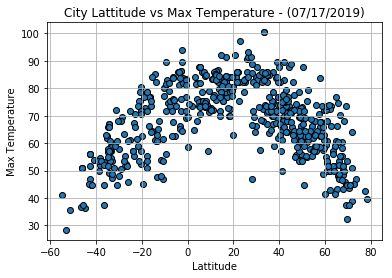

<Figure size 432x288 with 0 Axes>

In [7]:
plotsplat(city_csv["Lattitude"],city_csv["Max Temperature"])
plt.savefig("output_data/max_temp.png")

#### Latitude vs. Humidity Plot

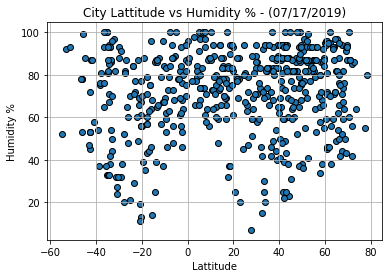

<Figure size 432x288 with 0 Axes>

In [8]:
plotsplat(city_csv["Lattitude"],city_csv["Humidity %"])
plt.savefig("output_data/humidity.png")

#### Latitude vs. Cloudiness Plot

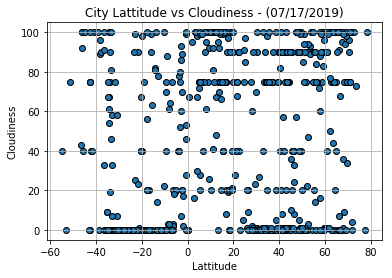

<Figure size 432x288 with 0 Axes>

In [9]:
plotsplat(city_csv["Lattitude"],city_csv["Cloudiness"])
plt.savefig("output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

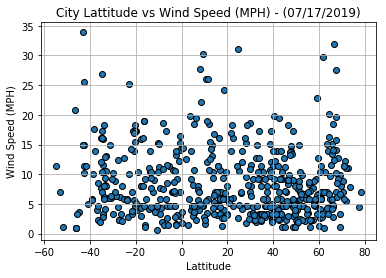

<Figure size 432x288 with 0 Axes>

In [10]:
plotsplat(city_csv["Lattitude"],city_csv["Wind Speed (MPH)"])
plt.savefig("output_data/wind_speed.png")